# Scaling excercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import wrangle as w

In [2]:
df = w.wrangle_zillow_data()
df.info()

Returning saved csv file.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095187 entries, 4 to 2152862
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   yearbuilt                     float64
 5   fips                          float64
 6   taxvaluedollarcnt             float64
 7   taxamount                     float64
 8   propertylandusetypeid         float64
 9   propertylandusedesc           object 
dtypes: float64(8), int64(1), object(1)
memory usage: 175.8+ MB


In [3]:
train, validate, test = w.split_zillow_data(df)
train.sample(3)
df = train.copy()

## Applying scalars
1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

#### Min Max Scaler

In [4]:
df_minmax = df[['taxamount']]
df_minmax

,taxamount
1571052,10125.24
1938950,3174.39
1171526,4585.82
1386826,7055.68
95133,5634.60
...,...
460612,3097.98
665697,4450.92
1635382,4461.74
1977329,5667.42


In [5]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df[['taxamount']])

MinMaxScaler()

In [6]:
scaled_minmax = minmax_scaler.transform(df_minmax)
df_minmax['taxamount_scaled'] = scaled_minmax

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/3597583560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax['taxamount_scaled'] = scaled_minmax


In [7]:
df_minmax

,taxamount,taxamount_scaled
1571052,10125.24,0.100750
1938950,3174.39,0.031495
1171526,4585.82,0.045558
1386826,7055.68,0.070166
95133,5634.60,0.056007
...,...,...
460612,3097.98,0.030734
665697,4450.92,0.044214
1635382,4461.74,0.044322
1977329,5667.42,0.056334


In [8]:
df_minmax.describe()

,taxamount,taxamount_scaled
count,1.173304e+06,1.173304e+06
mean,4.917770e+03,4.886526e-02
std,3.652810e+03,3.639490e-02
min,1.336000e+01,0.000000e+00
25%,2.508438e+03,2.485979e-02
50%,4.043475e+03,4.015419e-02
75%,6.218430e+03,6.182443e-02
max,1.003793e+05,1.000000e+00


Text(0.5, 1.0, 'Scaled')

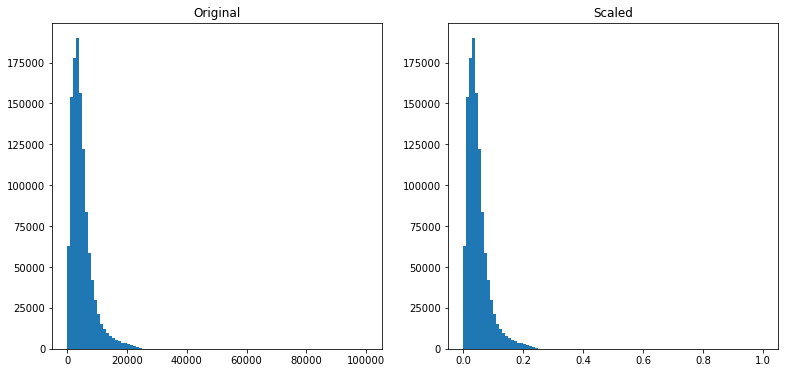

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_minmax.taxamount, bins=100)
plt.title('Original')
plt.subplot(122)
plt.hist(df_minmax.taxamount_scaled, bins=100)
plt.title('Scaled')

Now apply to the three columns via a loop

In [10]:
cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']

In [11]:
df_minmax_cols = df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']]
minmax_scalers = []
for column in cols_to_scale:
    minmax_scaler = MinMaxScaler()
    minmax_scaler.fit(df[[column]])
    scaled_minmax = minmax_scaler.transform(df_minmax_cols[[column]])
    df_minmax_cols[f"{column}_scaled"] = scaled_minmax
    scaler = {
        'column':column,
        'scaler':minmax_scaler
    }
    minmax_scalers.append(scaler)

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2831105412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax_cols[f"{column}_scaled"] = scaled_minmax
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2831105412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax_cols[f"{column}_scaled"] = scaled_minmax
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2831105412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

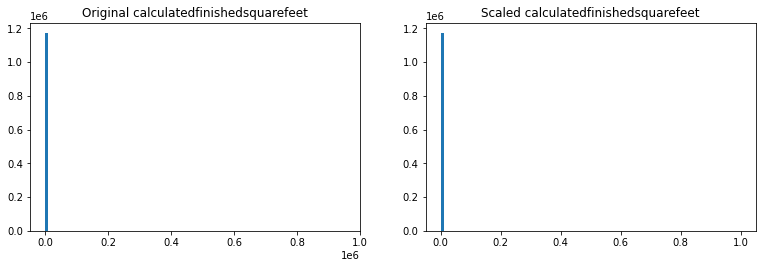

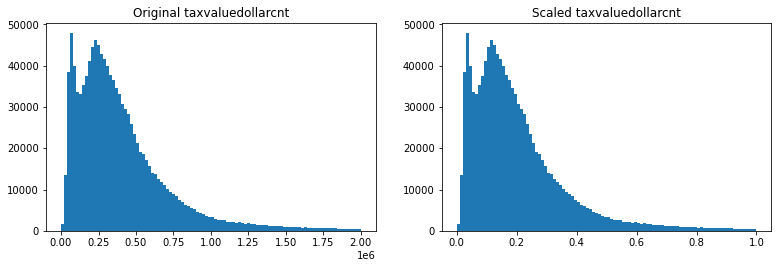

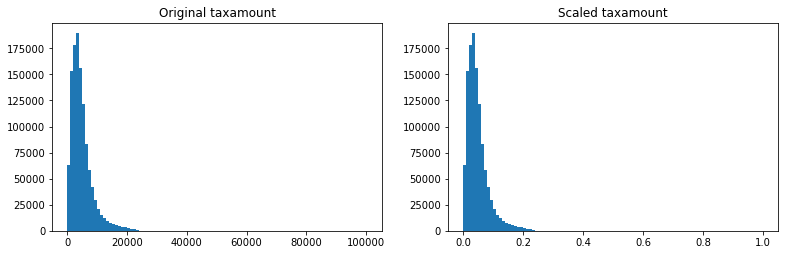

In [12]:
i = 321
for column in cols_to_scale: 
    plt.figure(figsize=(13, 13))
    plt.subplot(i)
    i+=1
    plt.hist(df_minmax_cols[column], bins=100)
    plt.title(f'Original {column}')
    plt.subplot(i)
    i+=1
    plt.hist(df_minmax_cols[f"{column}_scaled"], bins=100)
    plt.title(f'Scaled {column}')

In [13]:
df_minmax_cols

,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled,taxamount_scaled
1571052,5264.0,971668.0,10125.24,0.005525,0.485828,0.100750
1938950,1275.0,254438.0,3174.39,0.001337,0.127209,0.031495
1171526,1692.0,386787.0,4585.82,0.001775,0.193385,0.045558
1386826,2393.0,608919.0,7055.68,0.002511,0.304452,0.070166
95133,1439.0,472162.0,5634.60,0.001510,0.236073,0.056007
...,...,...,...,...,...,...
460612,1865.0,266626.0,3097.98,0.001957,0.133303,0.030734
665697,2496.0,385911.0,4450.92,0.002619,0.192947,0.044214
1635382,1586.0,363322.0,4461.74,0.001664,0.181652,0.044322
1977329,2324.0,440329.0,5667.42,0.002439,0.220156,0.056334


#### Standard Scaler

In [14]:
df_stand = df[['taxamount']]
df_stand

,taxamount
1571052,10125.24
1938950,3174.39
1171526,4585.82
1386826,7055.68
95133,5634.60
...,...
460612,3097.98
665697,4450.92
1635382,4461.74
1977329,5667.42


In [15]:
stand_scaler = StandardScaler()
stand_scaler.fit(df[['taxamount']])

StandardScaler()

In [16]:
scaled_stand = stand_scaler.transform(df_stand)
df_stand['taxamount_scaled'] = scaled_stand
scaled_stand

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/664651952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand['taxamount_scaled'] = scaled_stand


array([[ 1.42560718],
       [-0.47727114],
       [-0.0908753 ],
       ...,
       [-0.12484368],
       [ 0.20522564],
       [-1.10161814]])

In [17]:
df_stand

,taxamount,taxamount_scaled
1571052,10125.24,1.425607
1938950,3174.39,-0.477271
1171526,4585.82,-0.090875
1386826,7055.68,0.585278
95133,5634.60,0.196241
...,...,...
460612,3097.98,-0.498189
665697,4450.92,-0.127806
1635382,4461.74,-0.124844
1977329,5667.42,0.205226


In [18]:
df_stand.describe()

,taxamount,taxamount_scaled
count,1.173304e+06,1.173304e+06
mean,4.917770e+03,2.108406e-16
std,3.652810e+03,1.000000e+00
min,1.336000e+01,-1.342641e+00
25%,2.508438e+03,-6.595836e-01
50%,4.043475e+03,-2.393487e-01
75%,6.218430e+03,3.560712e-01
max,1.003793e+05,2.613375e+01


Text(0.5, 1.0, 'Scaled')

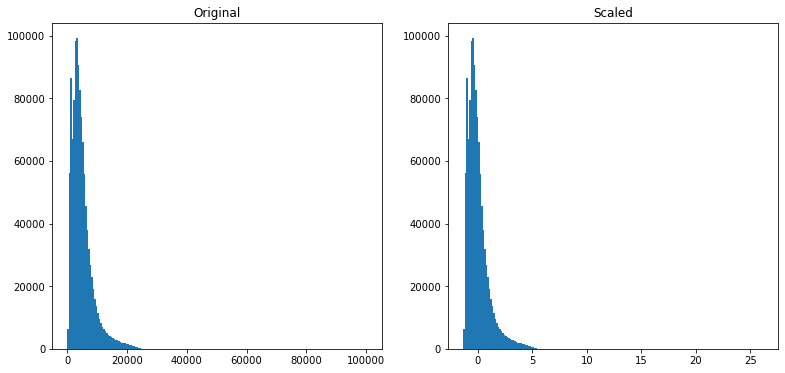

In [19]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_stand['taxamount'], bins=200)
plt.title('Original')
plt.subplot(122)
plt.hist(df_stand['taxamount_scaled'], bins=200)
plt.title('Scaled')

In [20]:
df_stand_cols = df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']]
stand_scalers = []
for column in cols_to_scale:
    stand_scaler = StandardScaler()
    stand_scaler.fit(df[[column]])
    scaled_stand = stand_scaler.transform(df_stand_cols[[column]])
    df_stand_cols[f"{column}_scaled"] = scaled_stand
    scaler = {
        'column':column,
        'scaler':stand_scaler
    }
    stand_scalers.append(scaler)

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2323779410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand_cols[f"{column}_scaled"] = scaled_stand
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2323779410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand_cols[f"{column}_scaled"] = scaled_stand
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2323779410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

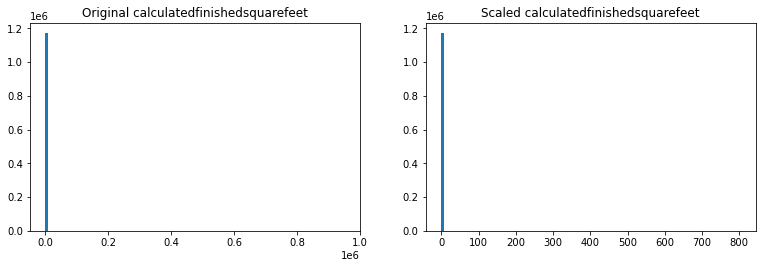

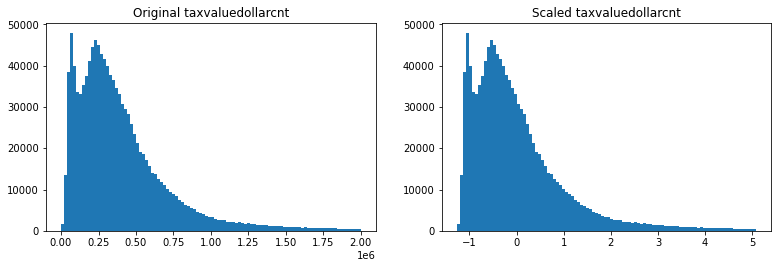

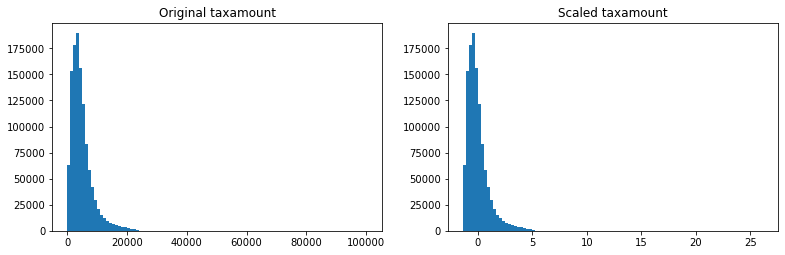

In [21]:
i = 321
for column in cols_to_scale: 
    plt.figure(figsize=(13, 13))
    plt.subplot(i)
    i+=1
    plt.hist(df_stand_cols[column], bins=100)
    plt.title(f'Original {column}')
    plt.subplot(i)
    i+=1
    plt.hist(df_stand_cols[f"{column}_scaled"], bins=100)
    plt.title(f'Scaled {column}')

In [22]:
df_stand_cols

,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled,taxamount_scaled
1571052,5264.0,971668.0,10125.24,2.928925,1.820074,1.425607
1938950,1275.0,254438.0,3174.39,-0.442876,-0.460613,-0.477271
1171526,1692.0,386787.0,4585.82,-0.090396,-0.039762,-0.090875
1386826,2393.0,608919.0,7055.68,0.502141,0.666585,0.585278
95133,1439.0,472162.0,5634.60,-0.304251,0.231718,0.196241
...,...,...,...,...,...,...
460612,1865.0,266626.0,3097.98,0.055836,-0.421857,-0.498189
665697,2496.0,385911.0,4450.92,0.589205,-0.042548,-0.127806
1635382,1586.0,363322.0,4461.74,-0.179996,-0.114378,-0.124844
1977329,2324.0,440329.0,5667.42,0.443817,0.130493,0.205226


#### RobustScaler

In [23]:
df_robust = df[['taxamount']]
df_robust

,taxamount
1571052,10125.24
1938950,3174.39
1171526,4585.82
1386826,7055.68
95133,5634.60
...,...
460612,3097.98
665697,4450.92
1635382,4461.74
1977329,5667.42


In [24]:
robust_scaler = RobustScaler()
robust_scaler.fit(df[['taxamount']])

RobustScaler()

In [25]:
scaled_robust = robust_scaler.transform(df_robust)
df_robust['taxamount_scaled'] = scaled_robust
scaled_robust

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2049686023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust['taxamount_scaled'] = scaled_robust


array([[ 1.63929307],
       [-0.23425519],
       [ 0.14618493],
       ...,
       [ 0.11274012],
       [ 0.43772191],
       [-0.84897881]])

In [26]:
df_robust

,taxamount,taxamount_scaled
1571052,10125.24,1.639293
1938950,3174.39,-0.234255
1171526,4585.82,0.146185
1386826,7055.68,0.811917
95133,5634.60,0.428876
...,...,...
460612,3097.98,-0.254851
665697,4450.92,0.109824
1635382,4461.74,0.112740
1977329,5667.42,0.437722


In [27]:
df_robust.describe()

,taxamount,taxamount_scaled
count,1.173304e+06,1.173304e+06
mean,4.917770e+03,2.356595e-01
std,3.652810e+03,9.845869e-01
min,1.336000e+01,-1.086287e+00
25%,2.508438e+03,-4.137576e-01
50%,4.043475e+03,0.000000e+00
75%,6.218430e+03,5.862424e-01
max,1.003793e+05,2.596659e+01


Text(0.5, 1.0, 'Scaled')

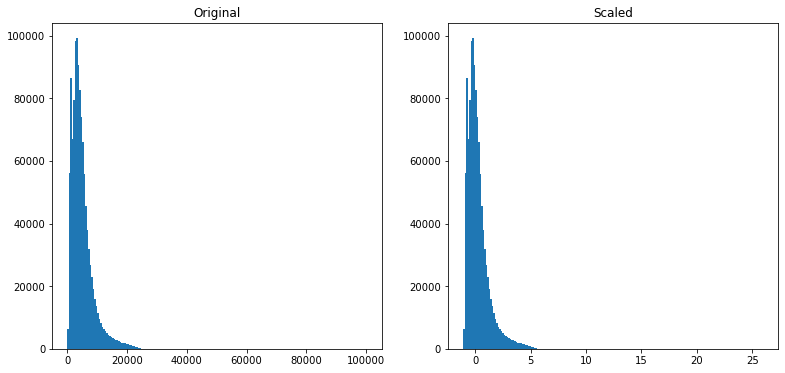

In [28]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_robust['taxamount'], bins=200)
plt.title('Original')
plt.subplot(122)
plt.hist(df_robust['taxamount_scaled'], bins=200)
plt.title('Scaled')

In [29]:
df_robust_cols = df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']]
robust_scalers = []
for column in cols_to_scale:
    robust_scaler = RobustScaler()
    robust_scaler.fit(df[[column]])
    scaled_robust = robust_scaler.transform(df_robust_cols[[column]])
    df_robust_cols[f"{column}_scaled"] = scaled_robust
    scaler = {
        'column':column,
        'scaler':robust_scaler
    }
    robust_scalers.append(scaler)
df_robust_cols

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2777467898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust_cols[f"{column}_scaled"] = scaled_robust
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2777467898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust_cols[f"{column}_scaled"] = scaled_robust
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/2777467898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled,taxamount_scaled
1571052,5264.0,971668.0,10125.24,4.018681,1.957395,1.639293
1938950,1275.0,254438.0,3174.39,-0.364835,-0.205223,-0.234255
1171526,1692.0,386787.0,4585.82,0.093407,0.193840,0.146185
1386826,2393.0,608919.0,7055.68,0.863736,0.863621,0.811917
95133,1439.0,472162.0,5634.60,-0.184615,0.451266,0.428876
...,...,...,...,...,...,...
460612,1865.0,266626.0,3097.98,0.283516,-0.168473,-0.254851
665697,2496.0,385911.0,4450.92,0.976923,0.191199,0.109824
1635382,1586.0,363322.0,4461.74,-0.023077,0.123088,0.112740
1977329,2324.0,440329.0,5667.42,0.787912,0.355282,0.437722


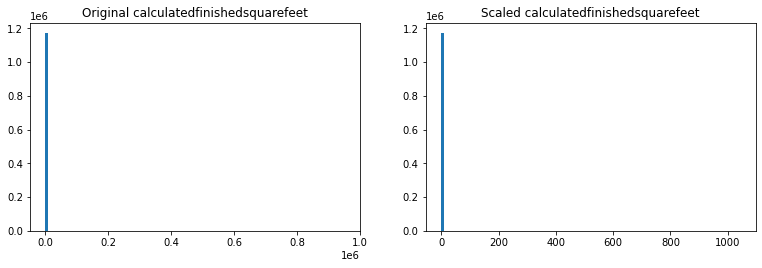

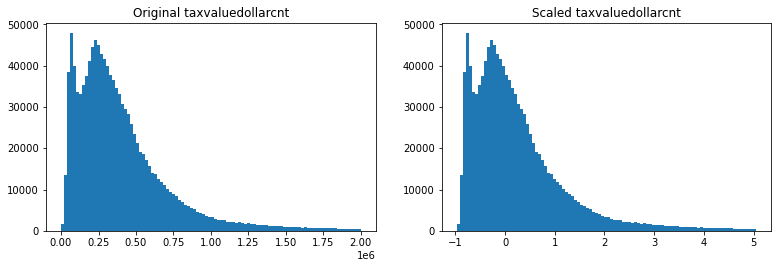

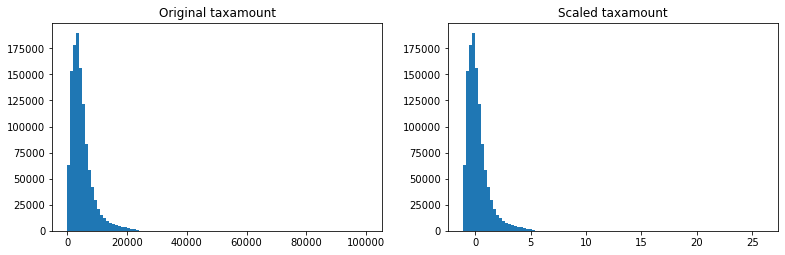

In [30]:
i = 321
for column in cols_to_scale: 
    plt.figure(figsize=(13, 13))
    plt.subplot(i)
    i+=1
    plt.hist(df_robust_cols[column], bins=100)
    plt.title(f'Original {column}')
    plt.subplot(i)
    i+=1
    plt.hist(df_robust_cols[f"{column}_scaled"], bins=100)
    plt.title(f'Scaled {column}')

## Use `inverse_transform`

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

#### MinMax scaler

In [31]:
df_minmax['taxamount_unscaled'] = minmax_scaler.inverse_transform(df_minmax[['taxamount_scaled']])
df_minmax

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1767203913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax['taxamount_unscaled'] = minmax_scaler.inverse_transform(df_minmax[['taxamount_scaled']])


,taxamount,taxamount_scaled,taxamount_unscaled
1571052,10125.24,0.100750,10125.24
1938950,3174.39,0.031495,3174.39
1171526,4585.82,0.045558,4585.82
1386826,7055.68,0.070166,7055.68
95133,5634.60,0.056007,5634.60
...,...,...,...
460612,3097.98,0.030734,3097.98
665697,4450.92,0.044214,4450.92
1635382,4461.74,0.044322,4461.74
1977329,5667.42,0.056334,5667.42


In [32]:
# percent that when unscaled are the same
df_minmax[df_minmax.taxamount == df_minmax.taxamount_unscaled].shape[0]/df_minmax.shape[0]

0.8516403250990365

In [33]:
#how off are they?
df_minmax['change_when_inverse'] = (abs(df_minmax.taxamount - df_minmax.taxamount_unscaled))
df_minmax['change_when_inverse'].describe()

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/3233437830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax['change_when_inverse'] = (abs(df_minmax.taxamount - df_minmax.taxamount_unscaled))


count    1.173304e+06
mean     1.393316e-13
std      5.118290e-13
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.455192e-11
Name: change_when_inverse, dtype: float64

85% of the data returns to the same value, and most of it is off by very little.  But these might be a programming artifact:

In [34]:
df_minmax[df_minmax['change_when_inverse']!=0]

,taxamount,taxamount_scaled,taxamount_unscaled,change_when_inverse
1386826,7055.68,0.070166,7055.68,9.094947e-13
1570205,7069.26,0.070302,7069.26,9.094947e-13
1862690,3398.84,0.033731,3398.84,4.547474e-13
1517840,14415.46,0.143496,14415.46,1.818989e-12
205629,1646.05,0.016267,1646.05,2.273737e-13
...,...,...,...,...
1055532,3487.44,0.034614,3487.44,4.547474e-13
2121138,3662.86,0.036362,3662.86,4.547474e-13
154585,802.49,0.007863,802.49,1.136868e-13
481036,3416.29,0.033905,3416.29,4.547474e-13


Do the same caluculation for the other columns

In [35]:
df_minmax_cols
for scaler_obj in minmax_scalers:
    scaler = scaler_obj['scaler']
    column = scaler_obj['column']
    df_minmax_cols[f'{column}_unscaled'] = scaler.inverse_transform(df_minmax_cols[[f'{column}_scaled']])
    df_minmax_cols[f'{column}_change'] = abs(df_minmax_cols[column] - df_minmax_cols[f"{column}_unscaled"])
df_minmax_cols[[f'{cols_to_scale[0]}_change',f'{cols_to_scale[1]}_change', f'{cols_to_scale[2]}_change']].describe()

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/652780939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax_cols[f'{column}_unscaled'] = scaler.inverse_transform(df_minmax_cols[[f'{column}_scaled']])
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/652780939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax_cols[f'{column}_change'] = abs(df_minmax_cols[column] - df_minmax_cols[f"{column}_unscaled"])
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipy

,calculatedfinishedsquarefeet_change,taxvaluedollarcnt_change,taxamount_change
count,1.173304e+06,1.173304e+06,1.173304e+06
mean,1.194571e-14,1.365670e-12,1.393316e-13
std,5.399655e-14,9.217071e-12,5.118290e-13
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,1.818989e-12,2.328306e-10,1.455192e-11


Now look at how much of the data is preserved without the rounding errors for each column

In [36]:
outputs = []
for column in cols_to_scale:
    prop = df_minmax_cols[df_minmax_cols[f"{column}_change"]==0].shape[0]/df_minmax_cols[column].shape[0]
    output = {
        'column':column,
        'proportion_saved':prop
    }
    outputs.append(output)
pd.DataFrame(outputs)

,column,proportion_saved
0,calculatedfinishedsquarefeet,0.943936
1,taxvaluedollarcnt,0.967911
2,taxamount,0.851640


#### Standard scaler

In [37]:
df_stand['taxamount_unscaled'] = stand_scaler.inverse_transform(df_stand[['taxamount_scaled']])
df_stand

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1565495096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand['taxamount_unscaled'] = stand_scaler.inverse_transform(df_stand[['taxamount_scaled']])


,taxamount,taxamount_scaled,taxamount_unscaled
1571052,10125.24,1.425607,10125.24
1938950,3174.39,-0.477271,3174.39
1171526,4585.82,-0.090875,4585.82
1386826,7055.68,0.585278,7055.68
95133,5634.60,0.196241,5634.60
...,...,...,...
460612,3097.98,-0.498189,3097.98
665697,4450.92,-0.127806,4450.92
1635382,4461.74,-0.124844,4461.74
1977329,5667.42,0.205226,5667.42


In [38]:
#how off are they?
df_stand['change_when_inverse'] = (abs(df_stand.taxamount - df_stand.taxamount_unscaled))
df_stand['change_when_inverse'].describe()

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/3846543623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand['change_when_inverse'] = (abs(df_stand.taxamount - df_stand.taxamount_unscaled))


count    1.173304e+06
mean     6.370687e-14
std      2.516497e-13
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.275958e-12
Name: change_when_inverse, dtype: float64

In [39]:
df_stand[df_stand['change_when_inverse'] == 0].shape[0]/df_stand.shape[0]

0.8583470268574896

85% of the data returns to the same value, and most of it is off by very little.  But these might be a programming artifact:

In [40]:
df_stand_cols
for scaler_obj in stand_scalers:
    scaler = scaler_obj['scaler']
    column = scaler_obj['column']
    df_stand_cols[f'{column}_unscaled'] = scaler.inverse_transform(df_stand_cols[[f'{column}_scaled']])
    df_stand_cols[f'{column}_change'] = abs(df_stand_cols[column] - df_stand_cols[f"{column}_unscaled"])
df_stand_cols[[f'{cols_to_scale[0]}_change',f'{cols_to_scale[1]}_change', f'{cols_to_scale[2]}_change']].describe()

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1537710646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand_cols[f'{column}_unscaled'] = scaler.inverse_transform(df_stand_cols[[f'{column}_scaled']])
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1537710646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand_cols[f'{column}_change'] = abs(df_stand_cols[column] - df_stand_cols[f"{column}_unscaled"])


,calculatedfinishedsquarefeet_change,taxvaluedollarcnt_change,taxamount_change
count,1.173304e+06,1.173304e+06,1.173304e+06
mean,1.314472e-15,2.718655e-12,6.370687e-14
std,1.640100e-14,1.683482e-11,2.516497e-13
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,1.818989e-12,2.328306e-10,7.275958e-12


Now look at how much of the data is preserved without the rounding errors for each column

In [41]:
outputs = []
for column in cols_to_scale:
    prop = df_stand_cols[df_stand_cols[f"{column}_change"]==0].shape[0]/df_stand_cols[column].shape[0]
    output = {
        'column':column,
        'proportion_saved':prop
    }
    outputs.append(output)
pd.DataFrame(outputs)

,column,proportion_saved
0,calculatedfinishedsquarefeet,0.989908
1,taxvaluedollarcnt,0.949871
2,taxamount,0.858347


#### RobustScaler

In [42]:
df_robust['taxamount_unscaled'] = robust_scaler.inverse_transform(df_robust[['taxamount_scaled']])
df_robust

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/695497883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust['taxamount_unscaled'] = robust_scaler.inverse_transform(df_robust[['taxamount_scaled']])


,taxamount,taxamount_scaled,taxamount_unscaled
1571052,10125.24,1.639293,10125.24
1938950,3174.39,-0.234255,3174.39
1171526,4585.82,0.146185,4585.82
1386826,7055.68,0.811917,7055.68
95133,5634.60,0.428876,5634.60
...,...,...,...
460612,3097.98,-0.254851,3097.98
665697,4450.92,0.109824,4450.92
1635382,4461.74,0.112740,4461.74
1977329,5667.42,0.437722,5667.42


In [43]:
#how off are they?
df_robust['change_when_inverse'] = (abs(df_robust.taxamount - df_robust.taxamount_unscaled))
df_robust['change_when_inverse'].describe()

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/980202199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust['change_when_inverse'] = (abs(df_robust.taxamount - df_robust.taxamount_unscaled))


count    1.173304e+06
mean     3.373677e-14
std      1.650568e-13
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.275958e-12
Name: change_when_inverse, dtype: float64

In [44]:
df_robust[df_robust['change_when_inverse'] == 0].shape[0]/df_robust.shape[0]

0.8847792217532711

88% of the data returns to the same value, and most of it is off by very little.  But these might be a programming artifact.


Overall, the `RobustScaler` is the best one.

In [45]:
robust_scalers

[{'column': 'calculatedfinishedsquarefeet', 'scaler': RobustScaler()},
 {'column': 'taxvaluedollarcnt', 'scaler': RobustScaler()},
 {'column': 'taxamount', 'scaler': RobustScaler()}]

In [46]:
df_robust_cols
for scaler_obj in robust_scalers:
    scaler = scaler_obj['scaler']
    column = scaler_obj['column']
    df_robust_cols[f'{column}_unscaled'] = scaler.inverse_transform(df_robust_cols[[f'{column}_scaled']])
    df_robust_cols[f'{column}_change'] = abs(df_robust_cols[column] - df_robust_cols[f"{column}_unscaled"])
df_robust_cols[[f'{cols_to_scale[0]}_change',f'{cols_to_scale[1]}_change', f'{cols_to_scale[2]}_change']].describe()

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/4029268828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust_cols[f'{column}_unscaled'] = scaler.inverse_transform(df_robust_cols[[f'{column}_scaled']])
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/4029268828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_robust_cols[f'{column}_change'] = abs(df_robust_cols[column] - df_robust_cols[f"{column}_unscaled"])
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/i

,calculatedfinishedsquarefeet_change,taxvaluedollarcnt_change,taxamount_change
count,1.173304e+06,1.173304e+06,1.173304e+06
mean,5.028830e-16,1.585661e-12,3.373677e-14
std,1.076865e-13,1.208413e-11,1.650568e-13
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,1.164153e-10,2.328306e-10,7.275958e-12


Now look at how much of the data is preserved without the rounding errors for each column. <a name='preserved'></a><a href='#five'>back to 6</a>

In [47]:
outputs = []
for column in cols_to_scale:
    prop = df_robust_cols[df_robust_cols[f"{column}_change"]==0].shape[0]/df_robust_cols[column].shape[0]
    output = {
        'column':column,
        'proportion_saved':prop
    }
    outputs.append(output)
pd.DataFrame(outputs)

,column,proportion_saved
0,calculatedfinishedsquarefeet,0.996448
1,taxvaluedollarcnt,0.963340
2,taxamount,0.884779


## Using `QuantileTransformer`

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [48]:
df_qnt = df[['taxamount']]
qnt_transformer = QuantileTransformer(output_distribution = 'normal')
qnt_transformer.fit(df[['taxamount']])

QuantileTransformer(output_distribution='normal')

In [49]:
scaled_qnt = qnt_transformer.transform(df_qnt)
df_qnt['taxamount_scaled'] = scaled_qnt
scaled_qnt

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/3045407943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qnt['taxamount_scaled'] = scaled_qnt


array([[ 1.40259687],
       [-0.34679888],
       [ 0.19602074],
       ...,
       [ 0.15380799],
       [ 0.5312421 ],
       [-1.8134295 ]])

In [50]:
df_qnt.describe()

,taxamount,taxamount_scaled
count,1.173304e+06,1.173304e+06
mean,4.917770e+03,4.521189e-03
std,3.652810e+03,9.956078e-01
min,1.336000e+01,-5.199338e+00
25%,2.508438e+03,-6.641247e-01
50%,4.043475e+03,5.872807e-03
75%,6.218430e+03,6.776415e-01
max,1.003793e+05,5.199338e+00


Text(0.5, 1.0, 'Scaled')

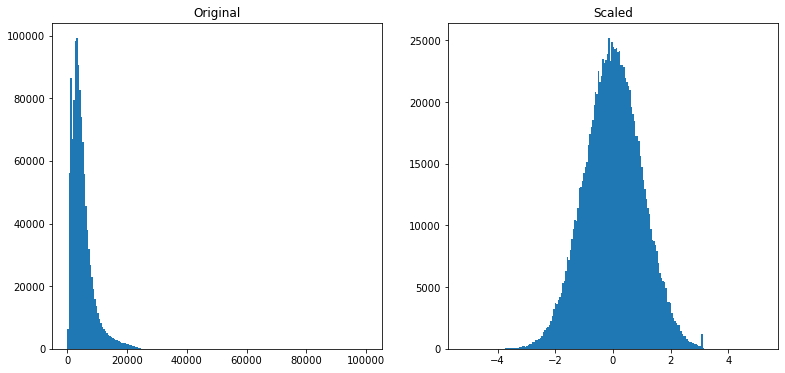

In [51]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_qnt['taxamount'], bins=200)
plt.title('Original')
plt.subplot(122)
plt.hist(df_qnt['taxamount_scaled'], bins=200)
plt.title('Scaled')

It made the data normally distributed.

## `QuantileTransformer` with `uniform`

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [52]:
df_qnt_uni = df[['taxamount']]
qnt_transformer_uni = QuantileTransformer()
qnt_transformer_uni.fit(df[['taxamount']])
scaled_qnt_uni = qnt_transformer_uni.transform(df_qnt_uni)
df_qnt_uni['taxamount_scaled'] = scaled_qnt_uni
scaled_qnt_uni

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/4147721154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qnt_uni['taxamount_scaled'] = scaled_qnt_uni


array([[0.91907406],
       [0.3593275 ],
       [0.57512153],
       ...,
       [0.55900217],
       [0.70194226],
       [0.03332571]])

In [53]:
df_qnt_uni.describe()

,taxamount,taxamount_scaled
count,1.173304e+06,1.173304e+06
mean,4.917770e+03,4.996143e-01
std,3.652810e+03,2.895170e-01
min,1.336000e+01,0.000000e+00
25%,2.508438e+03,2.489226e-01
50%,4.043475e+03,4.993810e-01
75%,6.218430e+03,7.506744e-01
max,1.003793e+05,1.000000e+00


Text(0.5, 1.0, 'Scaled')

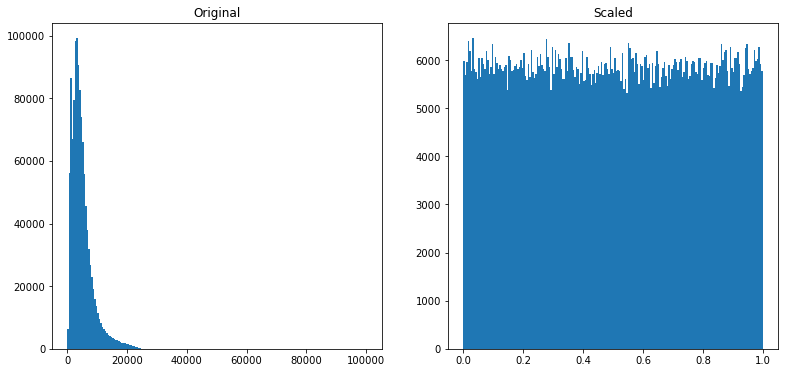

In [54]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df_qnt_uni['taxamount'], bins=200)
plt.title('Original')
plt.subplot(122)
plt.hist(df_qnt_uni['taxamount_scaled'], bins=200)
plt.title('Scaled')

Made the distribution roughly uniform

## `prepare.py` discussion <a name='five'></a>

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

It looks like the robust scaler preserves the data the best, at at least 88% of the data remaining the same after the inverse <a href='#preserved'>(see here for robust model stats)</a>. Use it for the `prepare.py` function.



In [55]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
1571052,14409782,4.0,4.5,5264.0,1990.0,6059.0,971668.0,10125.24,261.0,Single Family Residential
1938950,10874524,3.0,2.0,1275.0,1953.0,6037.0,254438.0,3174.39,261.0,Single Family Residential
1171526,14133008,3.0,2.5,1692.0,1992.0,6059.0,386787.0,4585.82,261.0,Single Family Residential
1386826,14087817,5.0,3.0,2393.0,2004.0,6059.0,608919.0,7055.68,261.0,Single Family Residential
95133,14192299,3.0,2.0,1439.0,1971.0,6059.0,472162.0,5634.60,261.0,Single Family Residential


In [56]:
def zillow_scale(df,
                columns = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount'],
                scaler_in=RobustScaler(),
                return_scalers=False):
    '''
    Returns a dataframe of the scaled columns
    
    Args:
        df (DataFrame) : The dataframe with the columns to scale
        columns (list) : The columns to scale, 
            default = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']
        scaler_in (sklearn.preprocessing) : scaler to use, default = RobustScaler()
        return_scalers (bool) : boolean to return a dictionary of the scalers used for 
            the columns, default = False
    Returns:
        df_scaled (DataFrame) : A dataframe containing the scaled columns
        scalers (dictionary) : a dictionary containing 'column' for the column name, 
            and 'scaler' for the scaler object used on that column
    '''
    scalers = []
    df_scaled = df[columns]
    for column in columns:
        scaler = scaler_in
        scaler.fit(df[[column]])
        scaled_col = scaler.transform(df[[column]])
        scaler = {
            'column':column,
            'scaler':scaler
        }
        scalers.append(scaler)
        df_scaled[f"{column}_scaled"] = scaled_col
    
    if return_scalers:
        return df_scaled.drop(columns = columns), scalers
    else:
        return df_scaled.drop(columns = columns)

In [57]:
scaled_df = zillow_scale(df)
scaled_df

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[f"{column}_scaled"] = scaled_col
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[f"{column}_scaled"] = scaled_col
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled,taxamount_scaled
1571052,4.018681,1.957395,1.639293
1938950,-0.364835,-0.205223,-0.234255
1171526,0.093407,0.193840,0.146185
1386826,0.863736,0.863621,0.811917
95133,-0.184615,0.451266,0.428876
...,...,...,...
460612,0.283516,-0.168473,-0.254851
665697,0.976923,0.191199,0.109824
1635382,-0.023077,0.123088,0.112740
1977329,0.787912,0.355282,0.437722


In [58]:
scaled_df, scalers = zillow_scale(df, return_scalers=True)
scalers

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[f"{column}_scaled"] = scaled_col
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[f"{column}_scaled"] = scaled_col
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

[{'column': 'calculatedfinishedsquarefeet', 'scaler': RobustScaler()},
 {'column': 'taxvaluedollarcnt', 'scaler': RobustScaler()},
 {'column': 'taxamount', 'scaler': RobustScaler()}]

test the `wrangle.py` script

In [59]:
df = w.wrangle_zillow_data()
train, validate, test = w.split_zillow_data(df)
scaled_df = zillow_scale(train)
scaled_df

Returning saved csv file.


/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[f"{column}_scaled"] = scaled_col
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[f"{column}_scaled"] = scaled_col
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_55829/1481772977.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled,taxamount_scaled
1571052,4.018681,1.957395,1.639293
1938950,-0.364835,-0.205223,-0.234255
1171526,0.093407,0.193840,0.146185
1386826,0.863736,0.863621,0.811917
95133,-0.184615,0.451266,0.428876
...,...,...,...
460612,0.283516,-0.168473,-0.254851
665697,0.976923,0.191199,0.109824
1635382,-0.023077,0.123088,0.112740
1977329,0.787912,0.355282,0.437722
